The goal of this exercise is a multiclass classification perfomed on  Lung Cancer Dataset (Augmented)


link = https://www.kaggle.com/datasets/subhajeetdas/iq-othnccd-lung-cancer-dataset-augmented

*Citation: alyasriy, hamdalla; AL-Huseiny, Muayed (2021), “The IQ-OTHNCCD lung cancer dataset”, Mendeley Data, V2, doi: 10.17632/bhmdr45bh2.2*

In [1]:
#import the enecesary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,Flatten,Dense,Dropout,MaxPooling2D,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
#Define and process the data
data =  'Augmented IQ-OTHNCCD lung cancer dataset'           #path to the dtatset
image_size = (200,200)                 #compress the image to standard 200 by 200
batchsize = 32


In [3]:
#preprocess the data by normalizing the pixels and spliting the data into training and  validation

datagen = ImageDataGenerator(
    rescale = 1. /255,
    validation_split = 0.25
)

In [4]:
#generate the training data

train_gen = datagen.flow_from_directory(
    data,                            #path to folder containing data
    target_size = image_size,
    batch_size = batchsize,
    class_mode = 'categorical' ,      #for multiclass classification
    subset = 'training',
    color_mode = 'grayscale'

)

Found 2707 images belonging to 3 classes.


In [5]:
#,generate the validation dataset
validation_gen = datagen.flow_from_directory(
    data,
    target_size=image_size,
    batch_size = batchsize,
    class_mode = 'categorical',
    subset = 'validation',
    color_mode = 'grayscale'
)

Found 902 images belonging to 3 classes.


In [6]:
#create the model
model  = Sequential([

        
    Conv2D(32,(3,3),activation='relu',input_shape = (200,200,1)),
    MaxPooling2D((2,2)),

    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2,)),
  

    Flatten(),

    Dense(64,activation='relu'),
    Dropout(0.5),

    Dense(3,activation='softmax')
])

model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 198, 198, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 147456)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     9,437,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,456,259 (36.07 MB)

 Trainable params: 9,456,259 (36.07 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
#fit the model
history = model.fit(
    train_gen,
    steps_per_epoch = train_gen.samples // batchsize,
    validation_data = validation_gen,
    validation_steps= validation_gen.samples // batchsize,
    epochs=5,
)

Epoch 1/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 88s 979ms/step - accuracy: 0.4896 - loss: 1.2464 - val_accuracy: 0.9074 - val_loss: 0.2980
Epoch 2/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 9s 101ms/step - accuracy: 0.7812 - loss: 0.5083 - val_accuracy: 0.9107 - val_loss: 0.2920
Epoch 3/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.8647 - loss: 0.3605 - val_accuracy: 0.9844 - val_loss: 0.0743
Epoch 4/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 11s 120ms/step - accuracy: 0.8750 - loss: 0.2187 - val_accuracy: 0.9777 - val_loss: 0.0817
Epoch 5/5
84/84 ━━━━━━━━━━━━━━━━━━━━ 79s 938ms/step - accuracy: 0.9377 - loss: 0.1857 - val_accuracy: 0.9888 - val_loss: 0.0301


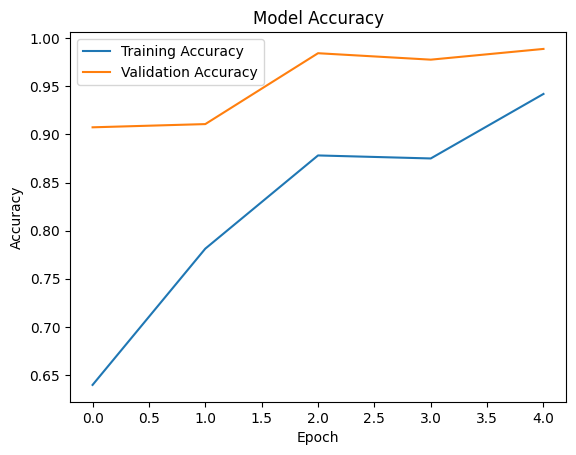

In [8]:
#plot the history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

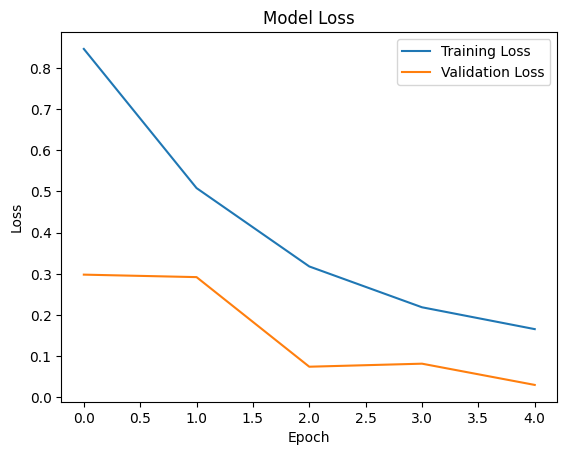

In [9]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
#confirm the accuracy
test_loss, test_accuracy = model.evaluate(validation_gen)

print(f'Model accuracy :{test_accuracy*100:.2f}%')

29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 254ms/step - accuracy: 0.9913 - loss: 0.0283
Model accuracy :98.89%
